In [2]:
#importamos las librerias necesarias

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_rangos_velocidad_provincia = pd.read_csv("Archivos csv/Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv", sep=';')
df_rangos_velocidad_provincia.head() #leemos el csv como dataframe

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,2,Buenos Aires,30.639,28.323,295.238,307.554,273.954,129.869,3.535.757,65.849,4.667.183
1,2022,2,Capital Federal,517.000,5.980,36.036,72.434,55.372,31.571,1.229.254,105.607,1.536.771
2,2022,2,Catamarca,71.000,413.000,3.678,6.155,7.165,3.393,43.926,2.207,67.008
3,2022,2,Chaco,461.000,1.047,17.603,20.109,8.391,15.974,76.271,3.708,143.564
4,2022,2,Chubut,109.000,1.444,45.804,31.217,34.290,14.526,15.394,20.021,162.805


In [16]:
df_rangos_velocidad_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  816 non-null    int64  
 1   Trimestre            816 non-null    int64  
 2   Provincia            816 non-null    object 
 3   HASTA 512 kbps       816 non-null    float64
 4   + 512 Kbps - 1 Mbps  766 non-null    float64
 5   + 1 Mbps - 6 Mbps    816 non-null    object 
 6   + 6 Mbps - 10 Mbps   778 non-null    float64
 7   + 10 Mbps - 20 Mbps  745 non-null    float64
 8   + 20 Mbps - 30 Mbps  712 non-null    float64
 9   + 30 Mbps            704 non-null    object 
 10  OTROS                363 non-null    float64
 11  Total                816 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 76.6+ KB


<AxesSubplot: xlabel='Año', ylabel='HASTA 512 kbps'>

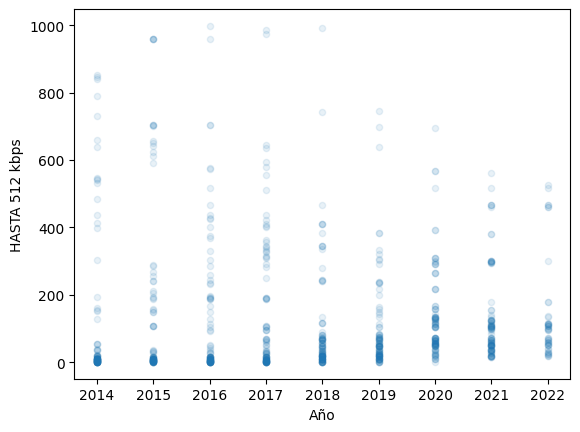

In [38]:
df_rangos_velocidad_provincia.plot(kind = "scatter", x = "Año", y = "HASTA 512 kbps", alpha = 0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

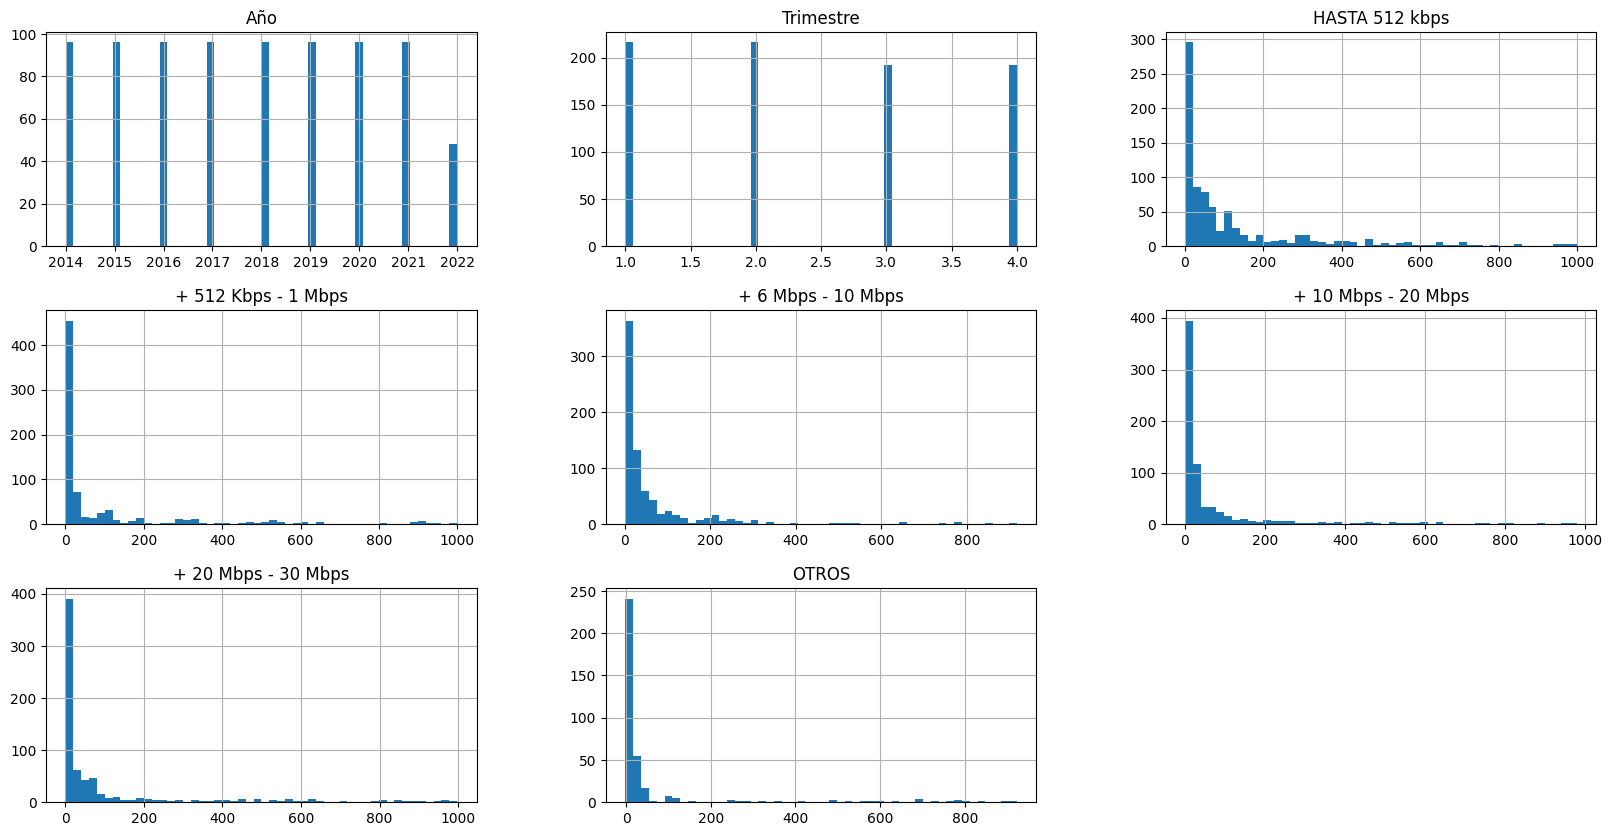

In [44]:
import matplotlib.pyplot as plt
df_rangos_velocidad_provincia.hist(bins = 50, figsize = (20,10))
plt.show

In [45]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.

from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [46]:
#analizamos la correlacion entre las features

df_rangos_velocidad_provincia_corr = df_rangos_velocidad_provincia.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_16912\736820738.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rangos_velocidad_provincia_corr = df_rangos_velocidad_provincia.corr()


In [47]:
df_rangos_velocidad_provincia_corr

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
Año,1.000000,-0.090628,-0.016099,0.302385,-0.004451,-0.179332,-0.009582,0.053497
Trimestre,-0.090628,1.000000,0.013458,-0.003560,0.019664,-0.035425,0.017215,0.061928
HASTA 512 kbps,-0.016099,0.013458,1.000000,-0.007367,0.075457,0.038525,0.032063,-0.005100
+ 512 Kbps - 1 Mbps,0.302385,-0.003560,-0.007367,1.000000,-0.031067,-0.104252,0.014977,0.025318
+ 6 Mbps - 10 Mbps,-0.004451,0.019664,0.075457,-0.031067,1.000000,0.143715,0.000359,-0.033701
+ 10 Mbps - 20 Mbps,-0.179332,-0.035425,0.038525,-0.104252,0.143715,1.000000,0.110927,0.192563
+ 20 Mbps - 30 Mbps,-0.009582,0.017215,0.032063,0.014977,0.000359,0.110927,1.000000,0.215283
OTROS,0.053497,0.061928,-0.005100,0.025318,-0.033701,0.192563,0.215283,1.000000


<AxesSubplot: >

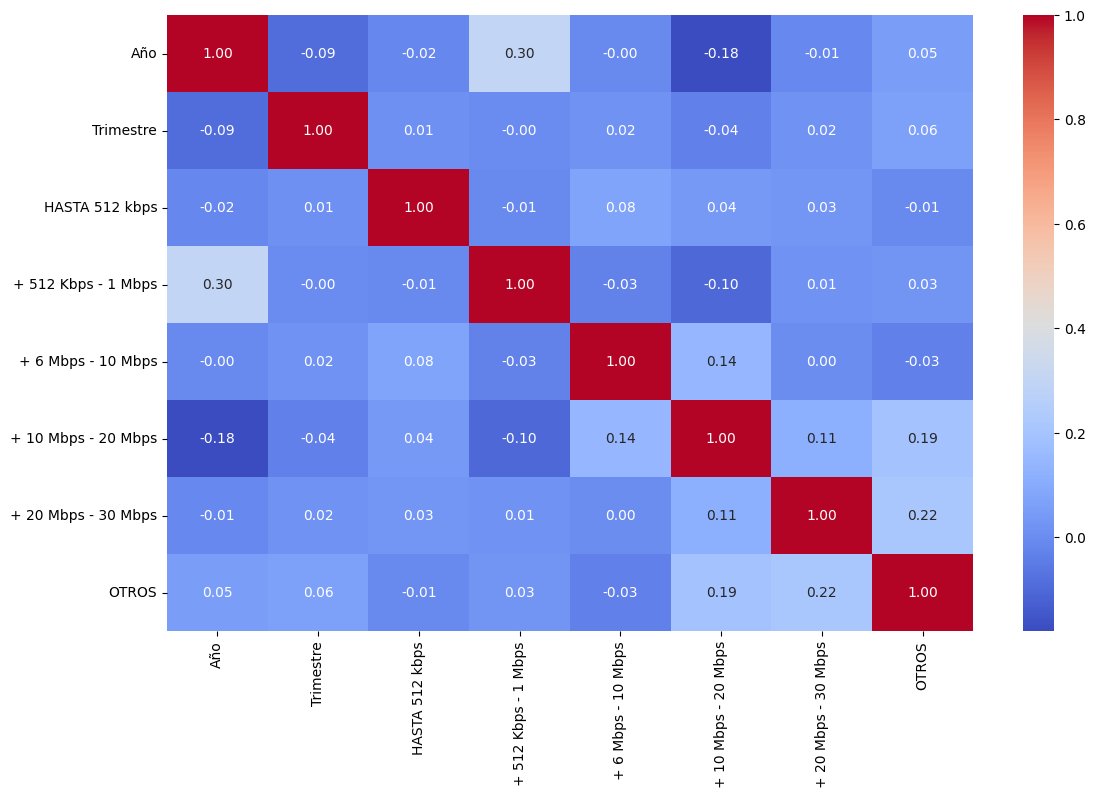

In [48]:
plt.figure(figsize=(13,8))
sns.heatmap(df_rangos_velocidad_provincia_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') #Graficamos las correlaciones con un mapa de calor

In [81]:
# Resumen de atributos numéricos para variables continuas
df_rangos_velocidad_provincia.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,816.000000,816.000000,816.000000,766.000000,778.000000,745.000000,712.000000,363.000000
mean,2017.764706,2.441176,125.968643,105.634072,75.628017,89.083144,115.401719,68.360287
std,2.463681,1.117170,188.807205,207.018619,144.360636,178.794299,219.126760,178.759597
min,2014.000000,1.000000,1.007000,1.000000,1.000000,1.000000,1.000000,-1.945000
25%,2016.000000,1.000000,10.000000,4.000000,5.984250,6.564000,3.861000,4.132500
50%,2018.000000,2.000000,49.000000,10.000000,21.372000,18.000000,15.814500,8.256000
75%,2020.000000,3.000000,134.754750,97.000000,68.025750,66.455000,77.257000,21.499000
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,923.000000


In [51]:
#Contamos los nulos por filas, realizaremos la limpieza directamente en el power uery habiendo identificado aquí donde se encuentran
print(df_rangos_velocidad_provincia.isna().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
811    3
812    1
813    3
814    4
815    2
Length: 816, dtype: int64


In [9]:
df_tecnologia_provincia = pd.read_csv("Archivos csv\Acceso a Internet fijo por tecnologia y provincia.csv", sep=';')
df_tecnologia_provincia.head() #leemos el csv como dataframe

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,2,Buenos Aires,350.652,2.719.613,1.399.043,126.847,71.028,4.667.183
1,2022,2,Capital Federal,145.491,1.232.226,121.506,5.757,31.791,1.536.771
2,2022,2,Catamarca,11.928,9.430,42.087,1.329,2.234,67.008
3,2022,2,Chaco,29.552,61.284,42.194,8.178,2.356,143.564
4,2022,2,Chubut,45.377,69.242,9.574,29.784,8.828,162.805


In [17]:
df_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           817 non-null    object 
 1   Trimestre     817 non-null    object 
 2   Provincia     816 non-null    object 
 3   ADSL          816 non-null    object 
 4   Cablemodem    802 non-null    object 
 5   Fibra óptica  807 non-null    object 
 6   Wireless      778 non-null    float64
 7   Otros         816 non-null    float64
 8   Total         816 non-null    object 
dtypes: float64(2), object(7)
memory usage: 57.6+ KB


In [52]:
#Contamos los nulos por filas, realizaremos la limpieza directamente en el power uery habiendo identificado aquí donde se encuentran
print(df_tecnologia_provincia.isna().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
812    0
813    0
814    0
815    0
816    7
Length: 817, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_16912\614189344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_tecnologia_provincia.corr()


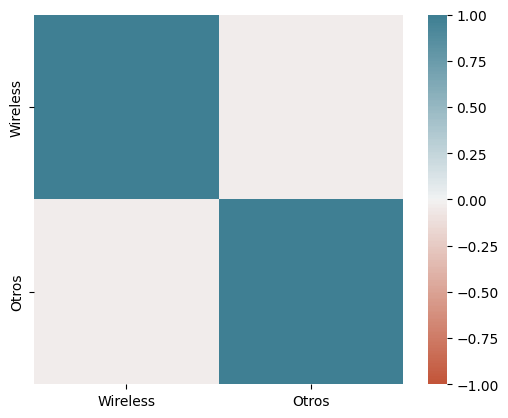

In [64]:
corr_matrix = df_tecnologia_provincia.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [67]:
df_tecnologia_localidad = pd.read_csv("Archivos csv\Accesos a Internet fijo por tecnologia y localidad.csv", sep=';')
df_tecnologia_localidad.head() #leemos el csv como dataframe

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"873,","4.704,",- 0,"2,",- 0,"975,",- 0,"664,","7.218,",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,"181,",- 0,- 0,- 0,"10,","1,",- 0,- 0,"192,",NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"181,","181,",NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,"782,",- 0,"6,","167,",- 0,- 0,"327,","1.282,",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"6,","6,",NaN


In [69]:
df_tecnologia_localidad = df_tecnologia_localidad.drop(df_tecnologia_localidad.columns[13], axis='columns')
df_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,"873,","4.704,",- 0,"2,",- 0,"975,",- 0,"664,","7.218,"
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,"181,",- 0,- 0,- 0,"10,","1,",- 0,- 0,"192,"
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"181,","181,"
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,"782,",- 0,"6,","167,",- 0,- 0,"327,","1.282,"
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"6,","6,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,El Cadillal,90105070,- 0,- 0,- 0,- 0,- 0,"1,",- 0,- 0,"1,"
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"313,","313,"
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,"169,",- 0,- 0,- 0,- 0,- 0,- 0,"99,","268,"
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,"1.917,",- 0,- 0,- 0,"1,",- 0,- 0,"97,","2.015,"


Luego de eliminar la columna observamos que hay datos por corregir como los - 0 y las comas luego de los numeros. En Power Query realizaremos los reemplazos de los valores.


In [18]:
df_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


In [58]:
#Contamos los nulos por columnas
print(df_tecnologia_localidad.isna().sum())

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64


In [11]:
df_ingresos_miles_pesos = pd.read_csv("Archivos csv\Ingresos por la operacion del servicio de Internet fijo.csv", sep=';')
df_ingresos_miles_pesos.head() #leemos el csv como dataframe

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,2,60.942.843,Abr-Jun 2022
1,2022,1,56.195.811,Ene-Mar 2022
2,2021,4,45.467.887,Oct-Dic 2021
3,2021,3,42.999.944,Jul-Sept 2021
4,2021,2,38.239.667,Abr-Jun 2021


In [19]:
df_ingresos_miles_pesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        34 non-null     int64 
 1   Trimestre                  34 non-null     int64 
 2   Ingresos (miles de pesos)  34 non-null     object
 3   Periodo                    34 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [59]:
#Contamos los nulos por columnas
print(df_ingresos_miles_pesos.isna().sum())

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [12]:
df_localidades_conectividad = pd.read_csv("Archivos csv\Listado de localidades con conectividad a internet.csv", sep=';')
df_localidades_conectividad.head() #leemos el csv como dataframe y en Query agregaremos una columna donde la conectividad sea Si y No.

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,SI,SI,--,SI,SI,SI,SI,SI,SI
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,--,--,--,--,--,--,SI,--,--
2,BUENOS AIRES,25 de Mayo,Del Valle,SI,--,--,--,SI,SI,--,--,SI
3,BUENOS AIRES,25 de Mayo,Ernestina,SI,--,--,--,--,--,--,--,--
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,--,--,--,--,--,--,--,SI,--


In [20]:
df_localidades_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [60]:
#Contamos los nulos por columnas
print(df_localidades_conectividad.isna().sum())

Provincia        0
Partido          0
Localidad        0
ADSL             0
CABLEMODEM       0
DIALUP           0
FIBRAOPTICA      0
4G               0
3G               0
TELEFONIAFIJA    0
WIRELESS         0
SATELITAL        0
dtype: int64


In [13]:
df_internet_provincia_100hogares = pd.read_csv("Archivos csv\Penetracion del Internet fijo por provincia accesos por cada 100 hogares.csv", sep=';')
df_internet_provincia_100hogares.head() #leemos el csv como dataframe

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,2,Buenos Aires,"77,58"
1,2022,2,Capital Federal,"121,31"
2,2022,2,Catamarca,"62,4"
3,2022,2,Chaco,"43,79"
4,2022,2,Chubut,"83,19"


In [21]:
df_internet_provincia_100hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           816 non-null    int64 
 1   Trimestre                     816 non-null    int64 
 2   Provincia                     816 non-null    object
 3   Accesos por cada 100 hogares  816 non-null    object
dtypes: int64(2), object(2)
memory usage: 25.6+ KB


In [61]:
#Contamos los nulos por columnas
print(df_internet_provincia_100hogares.isna().sum())

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


In [14]:
df_TV_suscripcion_satelital = pd.read_csv("Archivos csv\Total nacional de accesos a television por suscripcion y television satelital.csv", sep=';')
df_TV_suscripcion_satelital.head() #leemos el csv como dataframe

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital,Periodo
0,2022,2,7.647.584,2.064.637,Abr-Jun 2022
1,2022,1,7.564.827,2.049.628,Ene-Mar 2022
2,2021,4,7.596.758,2.010.217,Oct-Dic 2021
3,2021,3,7.676.892,2.147.571,Jul-Sept 2021
4,2021,2,7.333.071,2.326.029,Abr-Jun 2021


In [22]:
df_TV_suscripcion_satelital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         33 non-null     int64 
 1   Trimestre                   33 non-null     int64 
 2   Accesos TV por suscripción  33 non-null     object
 3   Accesos TV satelital        33 non-null     object
 4   Periodo                     33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [62]:
#Contamos los nulos por columnas
print(df_TV_suscripcion_satelital.isna().sum())

Año                           0
Trimestre                     0
Accesos TV por suscripción    0
Accesos TV satelital          0
Periodo                       0
dtype: int64


In [15]:
df_velocidad_media_provincia = pd.read_csv("Archivos csv\Velocidad media de bajada de Internet fijo por provincia.csv", sep=';')
df_velocidad_media_provincia.head() #leemos el csv como dataframe

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,2,Buenos Aires,"66,"
1,2022,2,Capital Federal,"94,"
2,2022,2,Catamarca,"57,"
3,2022,2,Chaco,"51,"
4,2022,2,Chubut,"15,"


In [23]:
df_velocidad_media_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     816 non-null    int64 
 1   Trimestre               816 non-null    int64 
 2   Provincia               816 non-null    object
 3   Mbps (Media de bajada)  816 non-null    object
dtypes: int64(2), object(2)
memory usage: 25.6+ KB


In [63]:
#Contamos los nulos por columnas
print(df_velocidad_media_provincia.isna().sum())

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


A partir de este primer análisis pudimos determinar los tipos de datos, así como la cantidad de nulos por filas y columnas, los errores y valores faltantes, los datos sobrantes, aquellos valores que es posible reemplazar como el - 0 por el 0. Pudimos ver la correlacion entre los datos y su distribución, como se relacionan las features entre sí. También identificar la necesidad de normalizacion de las mayúsculas y minúsculas. Desde aqui descargué los datos como archivo csv y desde el power query directamente desde la API también para realizar una comparación de las tablas. Continúo el proceso de limpieza directo desde Power Query.
